# Exoring tutorial

This tutorial shows you how to set up a basig ring system geometry, set its parameters with respect to a star, and make a simple animation.

In [3]:
import exorings3 as exorings
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

## Make a set of rings and display them

Rings are defined with two numpy arrays, `r` and `tx`. The preferred unit for the radius is not distance, but **time**. The rationale for this is that the most uncertain astrophysical parameters for a transiting ring system are the diameter of the star and the transverse velocity of the rings with respect to the star.

We choose to stay in units of `days` and only convert to distances at the end of the analysis.

The transmission of the rings is defined such that the rings start at `r=0.0` and the ring from `(0.0,r[0])` has a transmission of `tx[0]`, the ring from `(r[0],r[1])` has a transmission of `tx[1]` and so on.

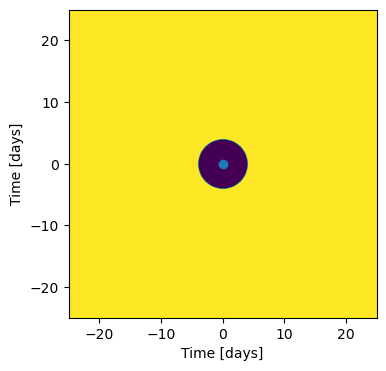

In [18]:
r =  np.array([4.0,8.0])
tx = np.array([0.50, 0.99999])

fig, ax = plt.subplots(1,1,figsize=(4,4))

exorings.draw_rings(r, tx, 0, 0, 0, ax)


The `draw_rings()` function takes the radii and transmission and plots the rings in a face on configuration with a default size of the display of 50 days and a blue dot marking the centre of the rings.

The three other parameters in `draw_rings()` are `hjd_central` which is the centre of the ring system on the x-axis, `i` which is the inclination of the ring system in degrees with 90 degrees being edge on, and `phi` which is the number of degrees that the long axis of the projected ring system is rotated clockwise.

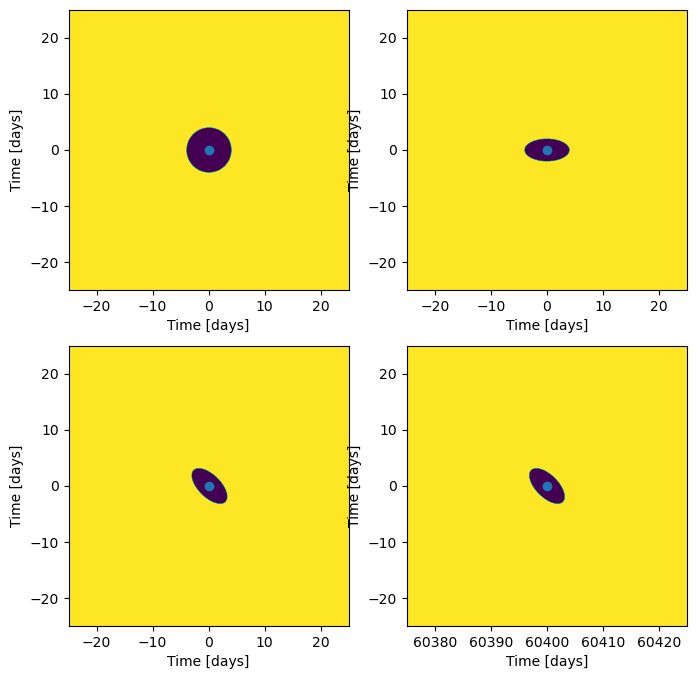

In [19]:

fig, axes = plt.subplots(2,2,figsize=(8,8))
ax=np.ndarray.flatten(axes)

exorings.draw_rings(r, tx, 0, 0, 0, ax[0])

exorings.draw_rings(r, tx, 0, 60, 0, ax[1])

exorings.draw_rings(r, tx, 0, 60, 45, ax[2])

exorings.draw_rings(r, tx, 60400, 60, 45, ax[3])

## Drawing the rings with vector primitives

The image in `draw_rings()` is drawn as a 2d numpy image array, and for large ring systems where you may want to zoom in on a feature, drawing the rings can be computationally expensive.

We have `draw_rings_vector()` which is the preferred way of drawing ring systems, which uses `Artist` based `Ellipse` paths to draw vector-based graphics instead, and also handles transparency/alpha channels - this is suitable for animations and PDF output files which are much smaller in size.




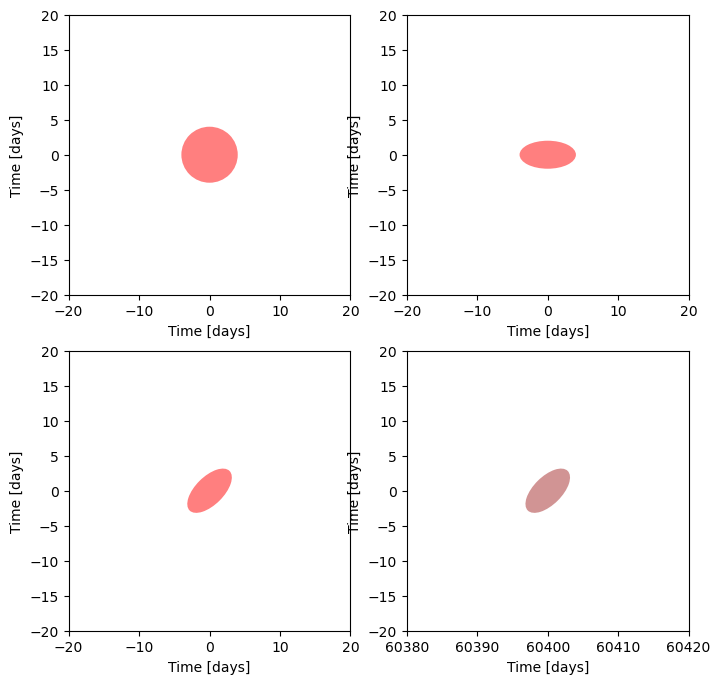

In [20]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
ax=np.ndarray.flatten(axes)

exorings.draw_rings_vector(r, tx, 0, 0, 0, ax[0])

exorings.draw_rings_vector(r, tx, 0, 60, 0, ax[1])

exorings.draw_rings_vector(r, tx, 0, 60, 45, ax[2])

# choose a different color for the rings
exorings.draw_rings_vector(r, tx, 60400, 60, 45, ax[3], ringcol='brown')

#draw_rings_vector(r, tau, xcen, incl, phi, p, ringcol='red', xrang=20., yrang=20.):

## Defining a star and the remaining parameters for a light curve

In order to make a light curve, you need to know the size and location of the star behind the ring system.

This is encoded in several parameters - the path of the star is defined to be parallel to the x-axis, which means that the y-axis offset is effectively the *impact parameter* of the star behind the ring system.

A second parameter is when the star's x-axis position is equal to the x-axis position of the centre of the ring system **IMPORTANT NOTE** this is NOT necessarily the same position as the mid-point of the light curve!!!

The final parameter is the relative velocity of the star with respect to the ring system, again measured in the slightly confusing units of stellar diameters per day. 

With all these parameters, a light curve can be computed for a given ring system.

We now set up a stellar disk, defined in a square grid with a size `s` and a limb darkening parameter `u`:

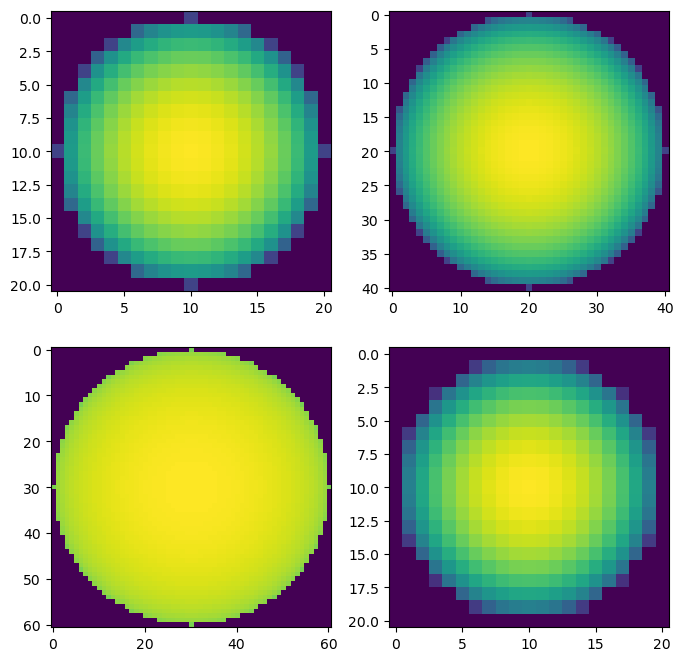

In [21]:

# set up stellar disk
s = 21
u = 0.8
kern = exorings.make_star_limbd(s, u)
fig, axes = plt.subplots(2,2,figsize=(8,8))
ax=np.ndarray.flatten(axes)

ax[0].imshow(kern)

ax[1].imshow(exorings.make_star_limbd(41, 0.8))

ax[2].imshow(exorings.make_star_limbd(61, 0.2))

ax[3].imshow(exorings.make_star_limbd(21, 1.0))

(0.0, 1.1)

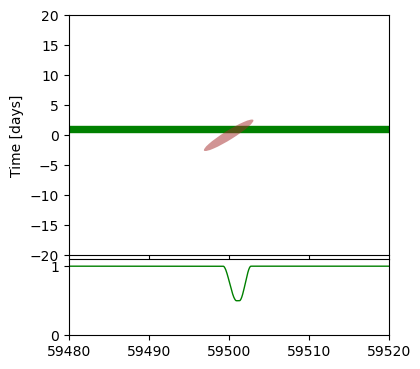

In [38]:
y = 1.
hjd_central = 59500.
i = 80
phi = 40

dstar=1
strip, convo, g = exorings.ellipse_strip(r, tx, y, hjd_central, i, phi, kern, dstar)

# produce fine grained gradient and ring values
samp_t = np.arange(-20, 20, 0.001) + hjd_central
(samp_r, samp_g) = exorings.ring_grad_line(samp_t, y, hjd_central, i, phi)
hjd_minr = samp_t[np.argmin(samp_g)]

fit_time = g[0]
fit_flux = g[1]

fig, axes = plt.subplots(2,1,figsize=(4,4),sharex=True)
ax=np.ndarray.flatten(axes)
exorings.draw_rings_vector(r, tx, hjd_central, i, phi, ax[0], ringcol='brown')

ax[1].plot(fit_time, fit_flux, linewidth=1, color='green')

star_line = mpl.patches.Rectangle((hjd_minr-50, y-dstar/2.), 100, dstar, color='g', zorder=-15)
ax[0].add_patch(star_line)
#ax[0].axis('scaled')
ax[0].set_position([0.1,0.3,0.8,0.6])
ax[1].set_position([0.1,0.1,0.8,0.19])

ax[1].set_ylim(0,1.1)